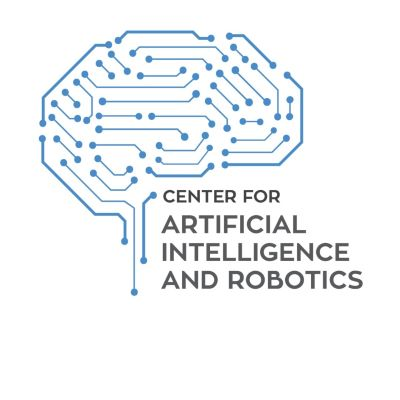

# Nima Ershadi

# Decision Trees and Random Forests Project

<div style="direction:rtl">
دیتاست مربوط به یک بنگاه مالی می باشد و هدف ما این است که حدس بزنیم آیا در صورت پرداخت وام به مشتری، آن را به ما بر می گرداند یا خیر.

## Import Libraries

<div style="direction:rtl">
کتابخانه های مورد نیاز را ایمپورت کنید.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div style="direction:rtl">
دیتاست مورد نظر را فرخوانی کنید و نگاه خلاصه ای به آن بیندازید و همچنین اطلاعات کلی و آماری آن را نمایش دهید.

In [81]:
loan = pd.read_csv('loan_data.csv')

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<div style="direction:rtl">
 و اما هر کدام از فیچر های بالا معرف مشخصات زیر می باشند. برای تمرین بیشتر و کسب آمادگی برای مواجهه با دیتاست های غیر آموزشی، این توضیحات به زبان اصلی ارائه می گردند.

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی در دیتاست گشت و گذار کنیم (تحلیل اکتشافی) تا ببینیم به چه اطلاعاتی دست پیدا می کنیم.

<div style="direction:rtl">
هیستوگرام فیچر fico را با تفکیک credit.policy در قالب دو نمودار روی هم ترسیم نمایید.

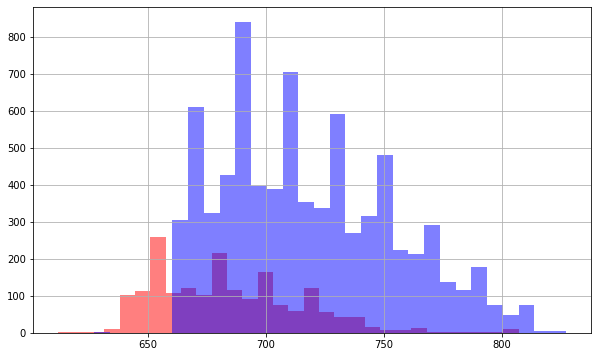

In [22]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy'] == 0]['fico'].hist(alpha = 0.5, color ='r', bins= 30)
loan[loan['credit.policy'] == 1]['fico'].hist(alpha = 0.5, color = 'b',bins= 30)


Text(0.5, 0, 'FICO')

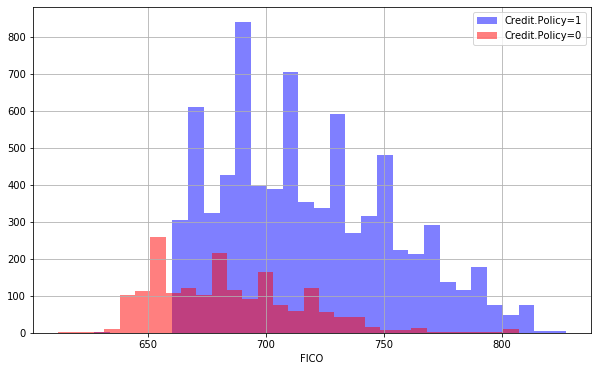

<div style="direction:rtl">
همان نمودار بالا را این بار با تفکیک لیبل یا همان not.fully.paid ترسیم نمایید.

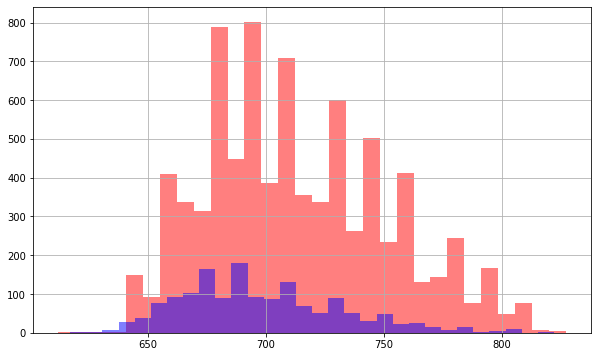

In [24]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid'] == 0]['fico'].hist(alpha = 0.5, color ='r', bins= 30)
loan[loan['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, color = 'b',bins= 30)


Text(0.5, 0, 'FICO')

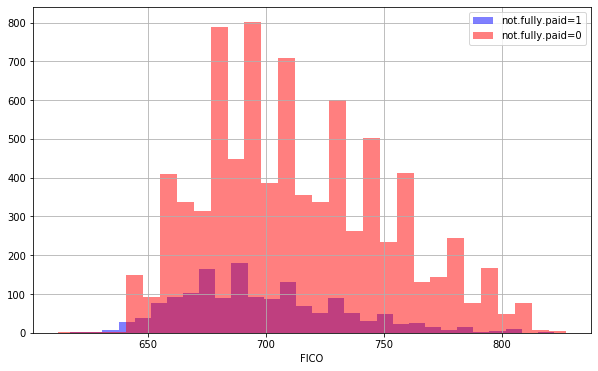

<div style="direction:rtl">
نمودار countplot را برای فیچر purpose با تفکیک مشتریانی که موفق به بازپرداخت وام شدند یا نشدند ترسیم نمایید.

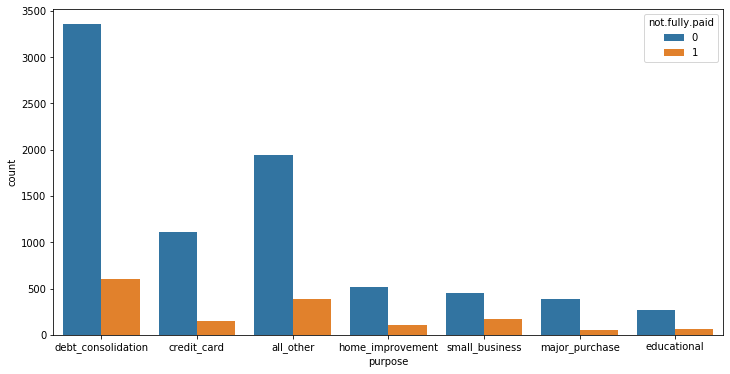

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'purpose', data= loan , hue='not.fully.paid')

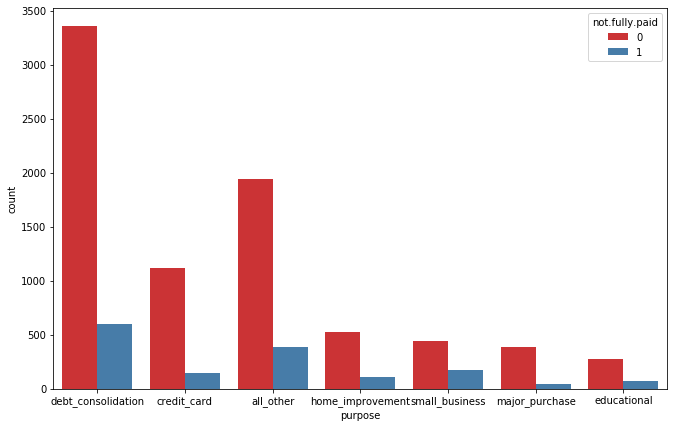

<div style="direction:rtl">
نمودار جوینت پلات را بر حسب دو فیچر fico و int.rate ترسیم نمایید.

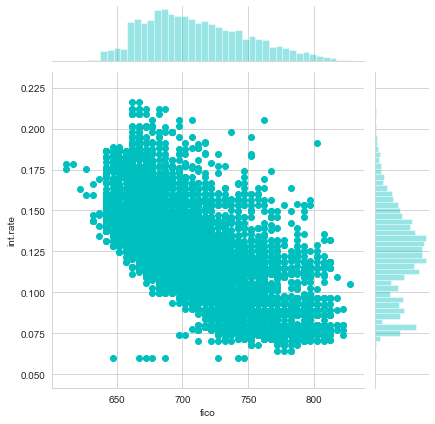

In [22]:
#sns.set_style('whitegrid')
sns.jointplot(x= 'fico', y= 'int.rate', data= loan, color= 'c')


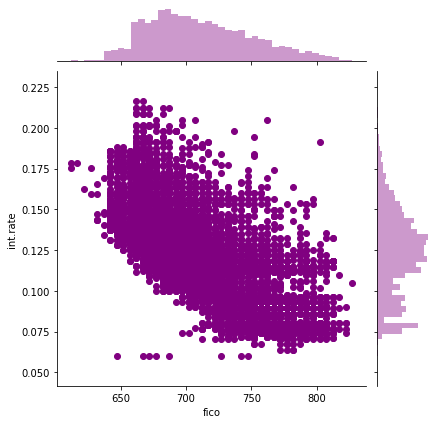

<div style="direction:rtl">
 خب به نظر می آید که یک همبتسگی کشف کردیم، برای بررسی دقیق تر این همبستگی ها، نمودار lmplot بر حسب fico و با دو ستون مختلف بر اساس این که وام پرداخت شده یا خیر و با تفکیک credit.policy رسم کنید.

<Figure size 1440x1008 with 0 Axes>

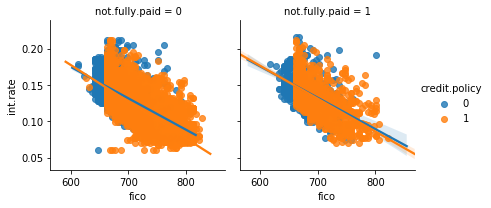

In [45]:
plt.figure(figsize=(20,14))
sns.FacetGrid(loan, col ="not.fully.paid",  hue ="credit.policy").map(sns.regplot, "fico", "int.rate").add_legend()

<Figure size 792x504 with 0 Axes>

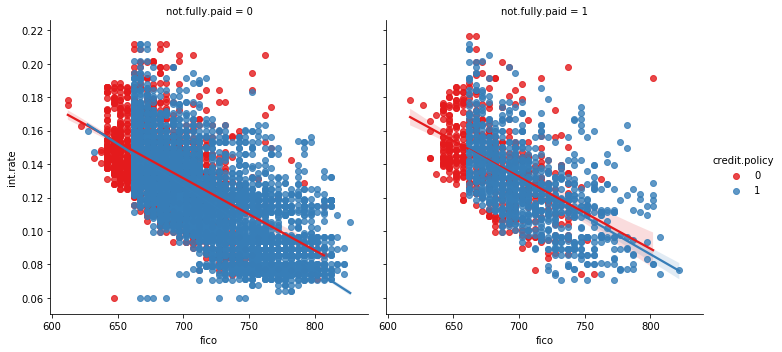

<div style="direction:rtl">
چه نتیجه ای می گیرید؟

<div style="direction:rtl">
نتیجه این که :

# Setting up the Data

## Categorical Features

<div style="direction:rtl">
فیچر های کتگوریکال را به نومریک تبدیل می کنیم.

In [82]:
x = pd.concat([loan,pd.get_dummies(loan['purpose'],drop_first = True)], axis=1)

In [96]:
x.drop('purpose',axis=1).head()

KeyError: "['purpose'] not found in axis"

In [98]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy         9578 non-null int64
int.rate              9578 non-null float64
installment           9578 non-null float64
log.annual.inc        9578 non-null float64
dti                   9578 non-null float64
fico                  9578 non-null int64
days.with.cr.line     9578 non-null float64
revol.bal             9578 non-null int64
revol.util            9578 non-null float64
inq.last.6mths        9578 non-null int64
delinq.2yrs           9578 non-null int64
pub.rec               9578 non-null int64
not.fully.paid        9578 non-null int64
credit_card           9578 non-null uint8
debt_consolidation    9578 non-null uint8
educational           9578 non-null uint8
home_improvement      9578 non-null uint8
major_purchase        9578 non-null uint8
small_business        9578 non-null uint8
dtypes: float64(6), int64(7), uint8(6)
memory usage: 1.0 MB


## Train Test Split


<div style="direction:rtl">
داده های مان را به دو بخش آموزش و تست تقسیم می کنیم.

In [86]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x.drop('not.fully.paid',axis=1),x['not.fully.paid'], test_size=0.33, random_state=42)

## Training a Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()

In [100]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [101]:
pred = dt.predict(x_test)

In [107]:
dt.score(x_test , y_test)


0.744068332806074

In [105]:
df_eval = pd.DataFrame({'Label': y_test, 'Predictions':pred})
df_eval


,Label,Predictions
8558,0,0
4629,0,0
1383,1,0
8142,0,0
1768,0,0
7583,0,0
6000,0,0
6978,0,0
9506,0,1
6560,0,0


In [108]:
from sklearn.metrics import confusion_matrix


In [109]:
print(confusion_matrix(y_test,pred))

[[2238  412]
 [ 397  114]]


[[1986  445]
 [ 340  103]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.22      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.75      3161



## Training the Random Forest model

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier()

In [115]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation of Random Forest

In [116]:
rf_pred = rf.predict(x_test)

In [118]:
df_eval = pd.DataFrame({'Label': y_test, 'Predictions':rf_pred})
df_eval

,Label,Predictions
8558,0,0
4629,0,0
1383,1,0
8142,0,0
1768,0,0
7583,0,0
6000,0,0
6978,0,0
9506,0,0
6560,0,0


In [120]:
rf.score(x_test,y_test)

0.8329642518190447

In [122]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rf_pred))

[[2603   47]
 [ 481   30]]


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2650
           1       0.39      0.06      0.10       511

    accuracy                           0.83      3161
   macro avg       0.62      0.52      0.50      3161
weighted avg       0.77      0.83      0.78      3161



<div style="direction:rtl">
با استفاده از ویژگی rfc.feature_importances_، مهم ترین فیچر های دخیل در این پبشبینی را نمایش دهید.

In [129]:
fi = pd.DataFrame({'Feature':x.columns[1:],'Importance':rf.feature_importances_*100}).sort_values('Importance',ascending=False)
fi

,Feature,Importance
8,inq.last.6mths,11.711484
2,log.annual.inc,11.591657
3,dti,11.422113
7,revol.util,11.258681
6,revol.bal,10.794568
4,fico,10.655328
1,installment,10.629450
5,days.with.cr.line,7.747941
9,delinq.2yrs,5.369856
13,debt_consolidation,1.604744


,feat,value
0,installment,11.637717
1,days.with.cr.line,11.327101
2,revol.util,11.268511
3,revol.bal,11.215778
4,dti,10.932962
5,log.annual.inc,10.892595
6,int.rate,10.276150
7,fico,7.854270
8,inq.last.6mths,5.408935
9,credit.policy,1.662911


<div style="direction:rtl">

## موفق باشید :)